In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import skimage
import utils

In [ ]:
def convolve_im(im: np.array,
                kernel: np.array,
                verbose=True):
    """ Convolves the image (im) with the spatial kernel (kernel),
        and returns the resulting image.

        "verbose" can be used for turning on/off visualization
        convolution
        
        Note: kernel can be of different shape than im.

    Args:
        im: np.array of shape [H, W]
        kernel: np.array of shape [K, K] 
        verbose: bool
    Returns:
        im: np.array of shape [H, W]
    """
    ### START YOUR CODE HERE ### (You can change anything inside this block)
    H, W = im.shape
    HF, WF = filter.shape
    fft_kernel = np.zeros((H,W))
    fft_kernel = fft_kernel(H/2 -  :,:)

    conv_result = im

    if verbose:
        # Use plt.subplot to place two or more images beside eachother
        plt.figure(figsize=(20, 4))
        # plt.subplot(num_rows, num_cols, position (1-indexed))
        plt.subplot(1, 5, 1)
        plt.imshow(im, cmap="gray")
        plt.subplot(1, 5, 2) 
        # Visualize FFT
        plt.subplot(1, 5, 3)
        # Visualize FFT kernel
        plt.subplot(1, 5, 4)
        # Visualize filtered FFT image
        plt.subplot(1, 5, 5) 
        # Visualize filtered spatial image
        plt.imshow(conv_result, cmap="gray")

    ### END YOUR CODE HERE ###
    return conv_result

In [2]:
if __name__ == "__main__":
    verbose = True  # change if you want

    # Changing this code should not be needed
    im = skimage.data.camera()
    im = utils.uint8_to_float(im)

    # DO NOT CHANGE
    gaussian_kernel = np.array([
        [1, 4, 6, 4, 1],
        [4, 16, 24, 16, 4],
        [6, 24, 36, 24, 6],
        [4, 16, 24, 16, 4],
        [1, 4, 6, 4, 1],
    ]) / 256
    image_gaussian = convolve_im(im, gaussian_kernel, verbose)

    # DO NOT CHANGE
    sobel_horizontal = np.array([
        [-1, 0, 1],
        [-2, 0, 2],
        [-1, 0, 1]
    ])
    image_sobelx = convolve_im(im, sobel_horizontal, verbose)

    if verbose:
        plt.show()

    utils.save_im("camera_gaussian.png", image_gaussian)
    utils.save_im("camera_sobelx.png", image_sobelx)

NameError: name 'skimage' is not defined

In [65]:
import numpy as np
import skimage
import utils
im = skimage.data.camera()
im = utils.uint8_to_float(im)
gaussian_kernel = np.array([
        [1, 4, 6, 4, 1],
        [4, 16, 24, 16, 4],
        [6, 24, 36, 24, 6],
        [4, 16, 24, 16, 4],
        [1, 4, 6, 4, 1],
    ]) / 256


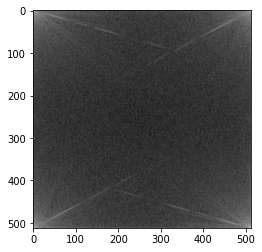

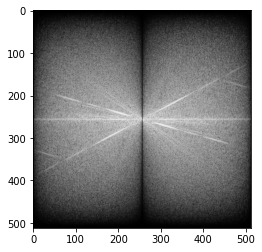

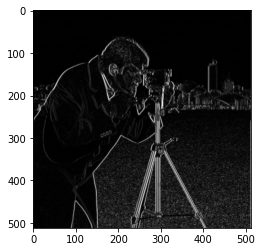

In [99]:
kernel = sobel_horizontal
import matplotlib.pyplot as plt
def complex_imshow(fft_im):
        fft_abs = np.abs(fft_im)
        c = 255/(np.log(1+np.max(fft_abs)))
        f = c*np.log(1+fft_abs)
        plt.imshow(f, cmap="gray")
center_col = im.shape[1] // 2
center_row = im.shape[0] // 2
fft_filter = np.zeros(im.shape)
HF, WF = kernel.shape
fft_filter[center_col - int(HF/2): center_col + int(HF/2)+1, center_row - int(WF/2): center_col + int(WF/2)+1] =  kernel
fft_kernel = np.fft.fft2(fft_filter)
fft_kernel_shifted = np.fft.fftshift(fft_kernel)
fft_image = np.fft.fft2(im)
fft_image_shifted = np.fft.fftshift(fft_image)
fft_conv = fft_kernel_shifted * fft_image_shifted
#fft_conv_shifted =  np.fft.ifftshift(fft_conv)
final_im =  np.fft.ifft2(fft_conv)
final_im = np.fft.ifftshift(final_im)

complex_imshow(fft_image)
plt.show()
complex_imshow(fft_conv)
plt.show()
complex_imshow(final_im)
plt.show()

In [28]:
sobel_horizontal = np.array([
        [-1, 0, 1],
        [-2, 0, 2],
        [-1, 0, 1]
    ])
fft = np.pad(sobel_horizontal, ((2, 3), (1, 2)),
                  constant_values=((0, 0), (0, 0)))
fft

array([[ 0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0],
       [ 0, -1,  0,  1,  0,  0],
       [ 0, -2,  0,  2,  0,  0],
       [ 0, -1,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0]])

In [54]:
center_col = im.shape[1] // 2
center_row = im.shape[0] // 2
print(center_row, center_col)

256 256


512